## **Welcome to the SB320qc RNA-Seq Workshop**

In this hands-on workshop you will be introduced to RNA-Seq data analysis, as well as multiple hypothesis testing and RNA composition bias.








In [0]:
### Added notes from Max ###

# Define the following URLs as variables for input into pd.read_csv()

# For example:

# URL_Variable = "Github Link"
# DataFrame_1 = pd.read_csv(URL)



# The URLs for needed files are hosted on GitHub:

URL_Pickrell_countsMatrix = "https://raw.githubusercontent.com/maxgmarin/SB220_RNAseq_Workshop/master/Pickrell_countsMatrix.txt"

URL_Pickrell_sampleAnnotations = "https://raw.githubusercontent.com/maxgmarin/SB220_RNAseq_Workshop/master/Pickrell_sampleAnnotations.txt"

URL_Ulhen_countsMatrix = "https://raw.githubusercontent.com/maxgmarin/SB220_RNAseq_Workshop/master/Ulhen_countsMatrix.txt"

Import statements:

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

**1** 

**Comparing gene expression between male and female human cell lines and dealing with multiple hypothesis testing.**

In this section you will be identifying genes whose expression level is significantly different in male vs. female immortalized lymphoblastic cell lines. 

**1.1**

We've taken the raw reads from Pickrell et al., *Nature* 2010, aligned them to the human reference genome, and counted how many reads map to each gene. The result is a matrix of read counts per gene per sample. Read counts are a proxy for gene expression, but will require some normalization before we can interpret them.

Read in the counts matrix from the file 'Pickrell_countsMatrix.txt' into a Pandas dataframe. Print the `head()` of this dataframe.

In [6]:
Pickrell_Counts_DF = pd.read_csv(URL_Pickrell_countsMatrix, sep="\t")
Pickrell_Counts_DF.head()

,Geneid,Chr,Start,End,Strand,Length,NA18486,NA18498,NA18499,NA18501,...,NA19204,NA19206,NA19207,NA19209,NA19210,NA19222,NA19225,NA19238,NA19239,NA19257
0,PKP1,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,201283452;201293942;201313166;201316553;201317...,201283904;201294045;201313560;201316697;201317...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,5447.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,RERE,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,8352404;8355419;8356100;8358196;8359764;836011...,8355120;8355599;8356246;8358916;8359986;836149...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-,8321.0,0,1,0,0,...,0,2,0,0,0,0,1,0,1,0
2,HIVEP3,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,41506365;41512816;41518402;41524735;41575544;4...,41511266;41513750;41518488;41524910;41575689;4...,-;-;-;-;-;-;-;-;-;-;-;-,14115.0,1414,1176,685,1042,...,843,1159,2253,1531,2955,595,611,952,1362,1095
3,CSMD2,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,33513999;33519465;33519812;33521463;33523307;3...,33516570;33519677;33519950;33521550;33523419;3...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,13920.0,475,358,349,237,...,196,320,576,630,459,106,364,301,292,563
4,SLC44A5,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,75202131;75206390;75211468;75213705;75213919;7...,75203833;75206719;75211552;75213793;75213989;7...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-,4224.0,1,2,1,0,...,0,1,0,0,0,0,0,2,2,0


**1.2**

We'd like to compute gene expression levels for each gene in each sample. 

*From now on, consider only genes for which we detect at least 1 count in at least 3 samples.* This will require you to filter your data to remove genes failing this criterion. 

For each gene in each sample, compute RPKM (reads per kilo-base of exon model per million reads) values:

$$RPKM_g = \frac{r_g+0.5}{((R+1)/10^6)(l_g/10^3)}$$

Where $r_g$ is read counts for gene *g*, 0.5 is a pseudo-count we're adding to the read counts, *R* is the total number of reads in the sample, 1 is a pseudo-count we're adding to *R*, and $l_g$ is the length in basepairs of the union of the exons of gene *g*.

Print the `head` of the resulting dataframe.

**1.3**

Plot the average $log_2(RPKM_g)$ of male vs. female samples.

To distinguish female from male samples, use the sample annotations in the file 'Pickrell_sampleAnnotations.txt'

Describe what you see.

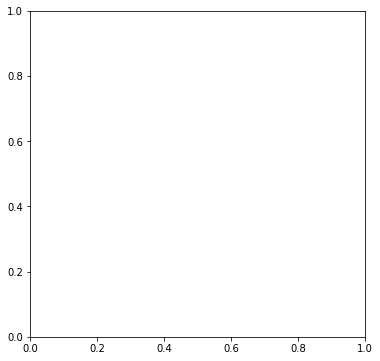

In [0]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)



**1.4**

Make an MA plot to visualize your data.

$$M_g = log_2(\frac{RPKM_g,male}{RPKM_g,female})$$

$$A_g = \frac{log_2(RPKM_g,male) + log_2(RPKM_g,female)}{2}$$

An MA plot is a scatter plot with the $M_g$ values on the y-axis and the $A_g$ values on the x-axis.

Describe what you see.

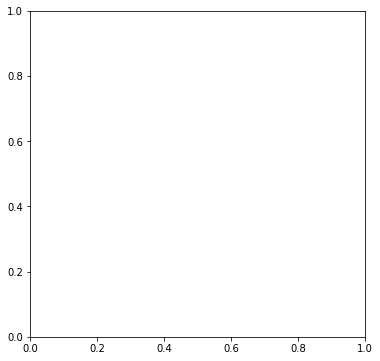

In [0]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)



**1.5**

For each gene, use the Student's *t*-test to test the null hypothesis that the (mean population) expression level of the gene is the same in female and male samples.

You will have to compute a *p*-value separately for each gene. For this exercise, compute the *t*-statistic from it's definition, then use `scipy.stats.t` to obtain the cumulative density function of the relevant distribution. 

**1.6**

For how many of genes can you reject the null hypothesis at a significance criterion of 0.05? What is the smallest p-value?

Does this seem like a lot or a little? Do all genes seem to have functions or features that make sense?

**1.7**

Plot your data as a volcano plot: $-log_{10}(p)$ (y-axis) vs $log_2(foldchange) (x-axis)$.

Describe what you see.

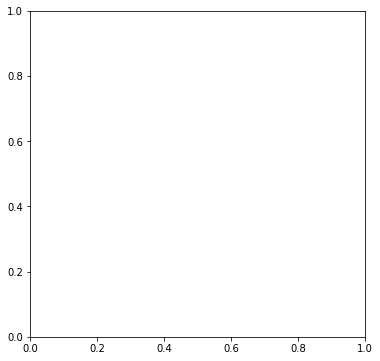

In [0]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)



**1.8**

Rather than rejecting the null hypothesis for all genes with $p<0.05$, perform a correction for multiple hypothesis testing. Use either the Bonferroni or the Benjamini-Hochberg procedure. Justify your choice.

**1.9**

For how many genes can you reject the null? In other words, how many genes can you conclude are differentially expressed between the male and female samples? Do the functions or features of these genes make sense?

**1.10**

When and why are procedures for multiple hypothesis testing -- such as the Bonferonni and the Benjamini-Hochberg procedure -- necessary?

**2** 

**Comparing gene expression between liver and kidney human tissues and recognizing RNA composition bias.**

In this section you'll be examining a much smaller data set of only 2 samples. You'll compare the gene expression of a human liver sample to that of a human kidney sample.

**2.1**

To help explain an important concept in RNA-Seq analysis, consider the following problem:

Imagine an opaque urn containing 10 red balls, 20 white balls, and 20 blue balls. You can't see how many balls are inside, nor their colors. If you reach in and draw 10 balls from this urn, on average, how many of each color ball would you expect to draw?

Now imagine a second identical urn, except with 50 additional blue balls added in. If you draw 10 balls, on average, how many of each color ball would you expect to draw?

How would you go about figuring out whether the number of red balls differs between the two urns? What makes this problem hard?

**2.2**

Repeat steps 1.1 through 1.4 above, but this time read in the counts matrix from Ulhen et al. comparing liver and kidney human tissue: 'Ulhen_countsMatrix.txt'.

Describe what you see in the MA plot and compare it to the MA plot from Section 1.

**2.3**

Choose a handful (5) of 'housekeeping genes' and remake the MA plot above, highlighting these housekeeping genes.

What are housekeeping genes? Describe what you see in the MA plot.

**2.4**

Discuss what might be causing what you're observing in the MA plot. Suggest an approach you could take to correct for this issue.